### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import pandas as pd

In [2]:
drug_df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categóricas con pocas categorías (menos de 10)

In [3]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [4]:
drug_df.describe(include='all')

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
features = ['effectiveness', 'sideEffects']
target = ['rating']


In [6]:
drug_df[features].describe(include='all')

,effectiveness,sideEffects
count,3107,3107
unique,5,5
top,Highly Effective,Mild Side Effects
freq,1330,1019


In [7]:
drug_df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [8]:
drug_df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

#### Transforma las columnas categóricas

Transforma las columnas categoricas a numericas mediante dummies

In [9]:
pd.get_dummies(drug_df['effectiveness'])

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,False,True,False,False,False
1,False,True,False,False,False
2,False,True,False,False,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
3102,False,True,False,False,False
3103,False,False,True,False,False
3104,False,False,False,True,False
3105,True,False,False,False,False


In [10]:
df_dum_ef = pd.get_dummies(drug_df['effectiveness'], dtype='int')
df_dum_ef

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
3102,0,1,0,0,0
3103,0,0,1,0,0
3104,0,0,0,1,0
3105,1,0,0,0,0


In [11]:
df_dum_se = pd.get_dummies(drug_df['sideEffects'], dtype='int')
df_dum_se

,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects
0,0,1,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
3102,0,1,0,0,0
3103,1,0,0,0,0
3104,0,0,1,0,0
3105,0,1,0,0,0


In [12]:
X = pd.concat([df_dum_ef, df_dum_se, drug_df['rating']], axis=1)
X

,Considerably Effective,Highly Effective,Ineffective,Marginally Effective,Moderately Effective,Extremely Severe Side Effects,Mild Side Effects,Moderate Side Effects,No Side Effects,Severe Side Effects,rating
0,0,1,0,0,0,0,1,0,0,0,4
1,0,1,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,1,0,10
3,0,0,0,1,0,0,1,0,0,0,3
4,0,0,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
3102,0,1,0,0,0,0,1,0,0,0,10
3103,0,0,1,0,0,1,0,0,0,0,1
3104,0,0,0,1,0,0,0,1,0,0,2
3105,1,0,0,0,0,0,1,0,0,0,8


In [13]:
X['rating']

0        4
1        1
2       10
3        3
4        2
        ..
3102    10
3103     1
3104     2
3105     8
3106     4
Name: rating, Length: 3107, dtype: int64

In [14]:
X['rating'].value_counts()

rating
10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: count, dtype: int64

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K.

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

seed = 42

models = []
for k in range(2, 200):
    km = KMeans(n_clusters=k, random_state=seed)
    km.fit(X)
    models.append(km)


C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (177). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (178). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (179). Possibly due to duplicate points in X.
  return fit_method(estim

In [16]:
models

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42),
 KMeans(n_clusters=21, random_state=42),
 KMeans(n_clusters=22, random_state=42),
 KMeans(n_clusters=23, random_state=42),
 KMeans(n_clusters=24, random_state=42),
 KMeans(n_clusters=25, random_state=42),
 KMeans(n_clusters=26, random_state=42

In [17]:
inertias = [model.inertia_ for model in models]
inertias

[9743.17403670804,
 6484.190939802005,
 4836.382199086927,
 4405.1328425699385,
 3922.1886112240545,
 3537.4850947581067,
 3486.829630794935,
 3051.6973182750207,
 2942.5633947124443,
 2770.629871676581,
 2572.3745433954305,
 2443.392285230931,
 2369.7906877613623,
 2293.3572867997177,
 2188.286106820738,
 2098.355900302366,
 2024.3274598215355,
 1959.6618221542399,
 1925.4321768419068,
 1809.3876368987565,
 1778.605048647421,
 1741.443612100718,
 1671.8745521166802,
 1596.0408614335083,
 1564.4154166419116,
 1486.6391079621635,
 1432.6789323226571,
 1378.6229671315984,
 1319.2067174729953,
 1303.9884845345969,
 1255.7591064479052,
 1220.0491687160556,
 1189.8608795935743,
 1162.1871168284529,
 1105.5383551482228,
 1075.0913168030634,
 1040.6434043660392,
 988.8423977028303,
 947.2503575146712,
 920.1832782166362,
 894.7461679183257,
 875.811493686608,
 866.8785342636634,
 844.1811258387547,
 819.5227747572983,
 798.7531691066904,
 773.2280418574248,
 735.1874477076487,
 710.5571002004

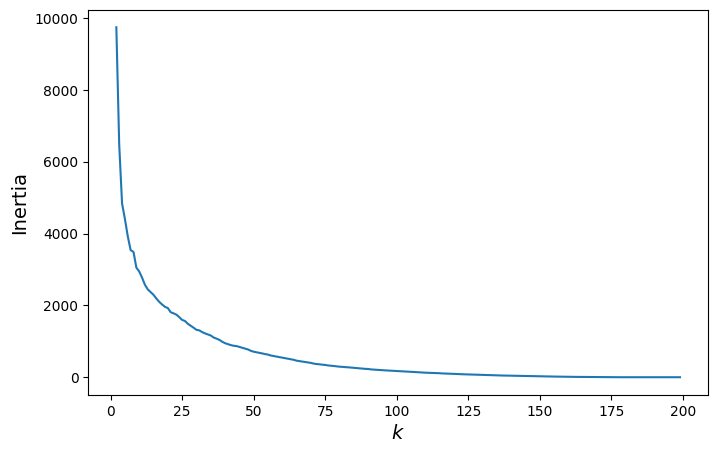

In [28]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(2, 200), inertias)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [19]:
km.labels_

array([163,  71,   2, ..., 127,  14,  47])

In [20]:
km.labels_.shape

(3107,)

In [21]:
silhouette_score(X, km.labels_)

0.9884132603797876

In [22]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(2, 200)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (177). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (178). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (176) found smaller than n_clusters (179). Possibly due to duplicate points in X.
  return fit_method(estim

In [23]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

In [24]:
silhouette_scores


[0.45301977160140894,
 0.39817528676924296,
 0.3777149532566565,
 0.35456362618162285,
 0.3704229125720001,
 0.34672148298944344,
 0.4207723398684703,
 0.43583439306301885,
 0.4455993444041647,
 0.4492777927271139,
 0.47898179101908644,
 0.4711354152434574,
 0.47022974159008896,
 0.4676285855845827,
 0.4947903379563803,
 0.5093472759764301,
 0.5162173632874552,
 0.5193117349019889,
 0.5322169821311803,
 0.5405477080449346,
 0.5425623434685986,
 0.5541309383876297,
 0.5681070564818432,
 0.5706526645965764,
 0.5840712154888079,
 0.5879331431931408,
 0.5988769349925553,
 0.6151682400637908,
 0.6174652841363696,
 0.6288225320294728,
 0.6323647419696542,
 0.6350701856475044,
 0.6479381256931857,
 0.6682056737099596,
 0.6732822528655955,
 0.6799658483759385,
 0.6895510977823018,
 0.6990285135157616,
 0.7023687665766163,
 0.7119256909891303,
 0.7142750167646753,
 0.7163740789513966,
 0.721818876447145,
 0.7262194358998268,
 0.7322081144229374,
 0.7386400063651779,
 0.7488010811405782,
 0.7530

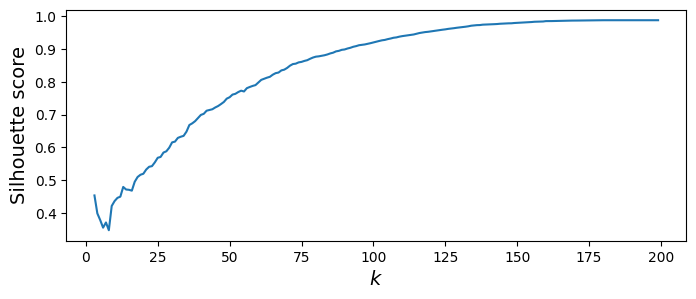

In [27]:
plt.figure(figsize=(8, 3))
plt.plot(range(3, 200), silhouette_scores)
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

In [ ]:
df_cluster

#### Genera el K Means 

Comprueba los resultados y muestra en un pie plot la distribución de los distintos clusters.

In [ ]:
df_cluster(['rating'])